<a href="https://colab.research.google.com/github/Aya-Jafar/Python/blob/main/Bioactivity-anlysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Bioactivity of molecules 
is defined as the ability of a compound to activate or inhibit cetrin proteins 



*   an active compoud will have IC50 less than 1mm (1000nm)
*   an inactive or inhibetor will have IC50 more than 1mm


IC50 is a quantitative measure that indicates how much of a particular inhibitory substance (e.g. drug) is needed to inhibit a specific target

We will use the  chembl database to get the targets that a specific drug could activate or inhibit


# Installing chembl

In [ ]:
! pip install chembl_webresource_client 

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached chembl_webresource_client-0.10.8-py3-none-any.whl (55 kB)
  Using cached requests_cache-0.7.5-py3-none-any.whl (39 kB)
  Using cached url_normalize-1.4.3-py2.py3-none-any.whl (6.8 kB)
  Using cached itsdangerous-2.1.2-py3-none-any.whl (15 kB)
     |████████████████████████████████| 60 kB 3.3 MB/s 
  Using cached PyYAML-6.0-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_12_x86_64.manylinux2010_x86_64.whl (596 kB)
  Created wheel for easydict: filename=easydict-1.9-py3-none-any.whl size=6349 sha256=0d6fa14f0664224c2ebb8915fed8e8ec97979b676edb21cdb72ec209be41ab6a
  Stored in directory: /root/.cache/pip/wheels/88/96/68/c2be18e7406804be2e593e1c37845f2dd20ac2ce1381ce40b0
Successfully built easydict


In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from chembl_webresource_client.new_client import new_client

# find the target proteins in the chembl database

In [ ]:
target = new_client.target 
targets = pd.DataFrame.from_dict(target.search('coronavirus'))
targets.head(5)

,cross_references,organism,pref_name,score,species_group_flag,target_chembl_id,target_components,target_type,tax_id
0,[],Coronavirus,Coronavirus,17.0,False,CHEMBL613732,[],ORGANISM,11119
1,[],SARS coronavirus,SARS coronavirus,15.0,False,CHEMBL612575,[],ORGANISM,227859
2,[],Feline coronavirus,Feline coronavirus,15.0,False,CHEMBL612744,[],ORGANISM,12663
3,[],Human coronavirus 229E,Human coronavirus 229E,13.0,False,CHEMBL613837,[],ORGANISM,11137
4,"[{'xref_id': 'P0C6U8', 'xref_name': None, 'xre...",SARS coronavirus,SARS coronavirus 3C-like proteinase,10.0,False,CHEMBL3927,"[{'accession': 'P0C6U8', 'component_descriptio...",SINGLE PROTEIN,227859


In [ ]:
targets.target_chembl_id

0     CHEMBL613732
1     CHEMBL612575
2     CHEMBL612744
3     CHEMBL613837
4       CHEMBL3927
5    CHEMBL4296578
6       CHEMBL5118
7    CHEMBL4523582
Name: target_chembl_id, dtype: object

In [ ]:
selected_target = targets.target_chembl_id[4] # for a single protein target
selected_target

'CHEMBL3927'

In [ ]:
activity = new_client.activity
res = activity.filter(target_chembl_id=selected_target).filter(standard_type="IC50")

In [ ]:
df = pd.DataFrame.from_dict(res)
df.head(3)

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5


In [ ]:
df.shape

(133, 45)

In [ ]:
df['standard_value'] # represents the potency of the drug (concentration of a drug , the less the better)

0       7200.0
1       9400.0
2      13500.0
3      13110.0
4       2000.0
        ...   
128    10600.0
129    10100.0
130    11500.0
131    10700.0
132    78900.0
Name: standard_value, Length: 133, dtype: object

In [ ]:
# Select the non-null standard value 
df = df[df.standard_value.notna()]
df.head()

,activity_comment,activity_id,activity_properties,assay_chembl_id,assay_description,assay_type,assay_variant_accession,assay_variant_mutation,bao_endpoint,bao_format,...,target_organism,target_pref_name,target_tax_id,text_value,toid,type,units,uo_units,upper_value,value
0,None,1480935,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,7.2
1,None,1480936,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,9.4
2,None,1481061,[],CHEMBL830868,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.5
3,None,1481065,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,13.11
4,None,1481066,[],CHEMBL829584,In vitro inhibitory concentration against SARS...,B,None,None,BAO_0000190,BAO_0000357,...,SARS coronavirus,SARS coronavirus 3C-like proteinase,227859,None,None,IC50,uM,UO_0000065,None,2.0


In [ ]:
bioactivity_state = []
for i in df.standard_value:
  if float(i) >= 1000 :
    bioactivity_state.append('Inactive')
  elif float(i) <= 1000 :
    bioactivity_state.append('Active')
  else:
    bioactivity_state.append('Intermediate')
bioactivity_state[:10]

['Inactive',
 'Inactive',
 'Inactive',
 'Inactive',
 'Inactive',
 'Active',
 'Inactive',
 'Active',
 'Inactive',
 'Inactive']

In [ ]:
molecule_id = list(df.molecule_chembl_id)
molecule_id[:5]

['CHEMBL187579',
 'CHEMBL188487',
 'CHEMBL185698',
 'CHEMBL426082',
 'CHEMBL187717']

In [ ]:
smiles = list(df.canonical_smiles)
smiles[:5]

['Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21',
 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21',
 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21',
 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]']

In [ ]:
standard_value= list(df.standard_value)
standard_value[:5]

['7200.0', '9400.0', '13500.0', '13110.0', '2000.0']

In [ ]:
# Combine the 4 lists in one data frame
data_tuples = list(zip(molecule_id, smiles, standard_value,bioactivity_state))
print(data_tuples)
new_df = pd.DataFrame( data_tuples,  columns=['molecule_chembl_id', 'canonical_smiles', 'standard_value', 'bioactivity_class'])
new_df[:10]

[('CHEMBL187579', 'Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21', '7200.0', 'Inactive'), ('CHEMBL188487', 'O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21', '9400.0', 'Inactive'), ('CHEMBL185698', 'O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21', '13500.0', 'Inactive'), ('CHEMBL426082', 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21', '13110.0', 'Inactive'), ('CHEMBL187717', 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-]', '2000.0', 'Inactive'), ('CHEMBL365134', 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21', '980.0', 'Active'), ('CHEMBL187598', 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21', '4820.0', 'Inactive'), ('CHEMBL190743', 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21', '950.0', 'Active'), ('CHEMBL365469', 'O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21', '11200.0', 'Inactive'), ('CHEMBL188983', 'O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21', '23500.0', 'Inactive'), ('CHEMBL191575', 'O=C(Nc1ccc(Cl)cc1)c1ccc(CN2C(=O)C(=O)c3cc(I)ccc32)s1', '12570.0', 'Inactive'), ('CHEMBL370923', 'O=C1C(=O)N(Cc2ccc(C(=O)N3CCCCC3)s2)c2ccc(I)cc21', '1

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Inactive
5,CHEMBL365134,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c(Br)cccc21,980.0,Active
6,CHEMBL187598,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(F)cc21,4820.0,Inactive
7,CHEMBL190743,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccc(I)cc21,950.0,Active
8,CHEMBL365469,O=C1C(=O)N(Cc2cc3ccccc3s2)c2cccc(Cl)c21,11200.0,Inactive
9,CHEMBL188983,O=C1C(=O)N(C/C=C/c2cc3ccccc3s2)c2ccc(I)cc21,23500.0,Inactive


In [ ]:
! wget https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
! chmod +x Miniconda3-py37_4.8.2-Linux-x86_64.sh
! bash ./Miniconda3-py37_4.8.2-Linux-x86_64.sh -b -f -p /usr/local
! conda install -c rdkit rdkit -y
import sys
sys.path.append('/usr/local/lib/python3.7/site-packages/')

--2022-06-12 19:44:18--  https://repo.anaconda.com/miniconda/Miniconda3-py37_4.8.2-Linux-x86_64.sh
Resolving repo.anaconda.com (repo.anaconda.com)... 104.16.130.3, 104.16.131.3, 2606:4700::6810:8203, ...
Connecting to repo.anaconda.com (repo.anaconda.com)|104.16.130.3|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 85055499 (81M) [application/x-sh]
Saving to: ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’

Miniconda3-py37_4.8 100%[===================>]  81.12M  82.1MB/s    in 1.0s    

2022-06-12 19:44:19 (82.1 MB/s) - ‘Miniconda3-py37_4.8.2-Linux-x86_64.sh.1’ saved [85055499/85055499]

PREFIX=/usr/local
Unpacking payload ...
Solving environment: / - \ | / - \ | / - \ | / - failed with initial frozen solve. Retrying with flexible solve.
Solving environment: | / - \ | / - \ | / - failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: - \ | / - \ | / 

# Calculating descriptors

Christopher Lipinski, a scientist who came up with a set of rules that describes the **druglikeness** of a compound which based on the Absorption, Distribution, Metabolism and Excretion (ADME) 
Lipinski found that FDA approval of drugs based on these rules which is called Rule-of-Five or Lipinski's Rule.

In [ ]:
import numpy as np
from rdkit import Chem
from rdkit.Chem import Descriptors, Lipinski

In [ ]:
# Testing rdkit
e =  Chem.MolFromSmiles('CCC=CC')
print(e.GetBonds()[2].GetBondType())
print(e is None)

DOUBLE
False


## Rule-of-Five


*  Molecular weight < 500 Dalton
*   Octanol-water partition coefficient (LogP) < 5
*  Hydrogen bond donors < 5
*   Hydrogen bond acceptors < 10




In [ ]:

def Calculate_descriptors(smiles):
    """ Takes a list of elements in the SMILES notation 
        return a data frame of each element descriptors
    """
    # Convert the SMILES notation into rdkit object
    elements= [ Chem.MolFromSmiles(elem)  for elem in smiles ]
    row_data= []
    i=0  
    for mol in elements:        
        # Calculate the Molecular weight of each Molecular
        desc_MolWt = Descriptors.MolWt(mol)
        # Calculate LogP (Octanol-water partition coefficient)
        desc_MolLogP = Descriptors.MolLogP(mol)
        # Calculate the # of H donors
        desc_NumHDonors = Lipinski.NumHDonors(mol)
        # Calculate the # of H acceptors
        desc_NumHAcceptors = Lipinski.NumHAcceptors(mol)
           
        row = np.array([desc_MolWt,
                        desc_MolLogP,
                        desc_NumHDonors,
                        desc_NumHAcceptors]) 
     
        if(i==0):
            row_data=row
        else:
            row_data=np.vstack([ row_data, row]) # Stack arrays in sequence vertically
        i+=1
    descriptors = pd.DataFrame(data=row_data,columns=["MW","LogP","Num H Donors","Num H Acceptors"] )
    return descriptors

df_lipinski = Calculate_descriptors(df.canonical_smiles)
df_lipinski.head()

,MW,LogP,Num H Donors,Num H Acceptors
0,281.271,1.89262,0.0,5.0
1,415.589,3.81320,0.0,2.0
2,421.190,2.66050,0.0,4.0
3,293.347,3.63080,0.0,3.0
4,338.344,3.53900,0.0,5.0


# Convert IC50 to PIC50

In [ ]:
mol_df = pd.concat([new_df,df_lipinski],axis=1)
mol_df[:5]

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,Num H Donors,Num H Acceptors
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,7200.0,Inactive,281.271,1.89262,0.0,5.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,9400.0,Inactive,415.589,3.81320,0.0,2.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,13500.0,Inactive,421.190,2.66050,0.0,4.0
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,13110.0,Inactive,293.347,3.63080,0.0,3.0
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],2000.0,Inactive,338.344,3.53900,0.0,5.0


In [ ]:
type(mol_df.standard_value)

pandas.core.series.Series

In [ ]:
mol_df.standard_value = mol_df.standard_value.astype(float)

In [ ]:
df['standard_value']

0       7200.0
1       9400.0
2      13500.0
3      13110.0
4       2000.0
        ...   
128    10600.0
129    10100.0
130    11500.0
131    10700.0
132    78900.0
Name: standard_value, Length: 133, dtype: object

(array([10., 11., 19., 20., 15., 11., 16.,  9., 12., 10.]),
 array([ 0. ,  9.5, 19. , 28.5, 38. , 47.5, 57. , 66.5, 76. , 85.5, 95. ]),
 <a list of 10 Patch objects>)

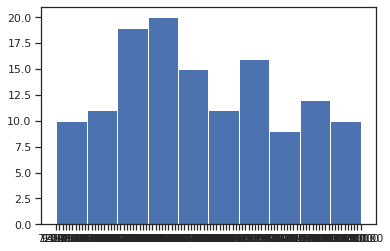

In [ ]:
import matplotlib.pyplot as plt
plt.hist(df['standard_value'])

In [ ]:
mol_df[ mol_df.standard_value.astype(float) > 100000000 ].head()

,molecule_chembl_id,canonical_smiles,standard_value,bioactivity_class,MW,LogP,Num H Donors,Num H Acceptors
22,CHEMBL208732,O=C(CSc1nccc(-c2csc(-c3ccccc3)n2)n1)Nc1cc(Cl)c...,3.311311e+14,Inactive,473.410,6.30470,1.0,6.0
24,CHEMBL210146,COc1cccc(-c2nc(SCC(=O)Nc3ccc([N+](=O)[O-])cc3)...,3.311311e+12,Inactive,437.437,3.36848,2.0,9.0
26,CHEMBL207458,CCOC(=O)c1cnc(SCC(=O)Nc2ccc([N+](=O)[O-])cc2)nc1N,3.981072e+12,Inactive,377.382,1.87450,2.0,9.0
28,CHEMBL207484,COC(OC)c1cc(O)nc(SCC(=O)Nc2ccc(C(F)(F)F)cc2)n1,4.897788e+12,Inactive,403.382,3.22320,2.0,7.0
30,CHEMBL207207,Cc1cc(O)nc(SCC(=O)Nc2cc(Cl)ccc2Oc2ccccc2)n1,1.000000e+13,Inactive,401.875,4.66712,2.0,6.0


In [ ]:
len(mol_df[mol_df.standard_value.astype(float) > 100000000]) 

28

In [ ]:
def norm_value(input):
    """
    Takes a data frame with un-normilized standard value 
    and return the normilized values of it
    """
    norm = []
    for i in input['standard_value']:
        if float(i) > 100000000:
          i = 100000000
        norm.append(i)

    input['standard_value_norm'] = norm
    x = input.drop('standard_value', 1)
        
    return x

In [ ]:
df_norm = norm_value(mol_df)
df_norm[:3]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  del sys.path[0]


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,Num H Donors,Num H Acceptors,standard_value_norm
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Inactive,281.271,1.89262,0.0,5.0,7200.0
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Inactive,415.589,3.81320,0.0,2.0,9400.0
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,13500.0


In [ ]:
len(df_norm[df_norm.standard_value_norm == 100000000])

28

### descriptive analysis in the original df Vs in normilized df

In [ ]:
mol_df.standard_value.describe()

count    1.330000e+02
mean     8.017926e+12
std      3.344888e+13
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      3.311311e+14
Name: standard_value, dtype: float64

In [ ]:
df_norm.standard_value_norm.describe()

count    1.330000e+02
mean     2.110164e+07
std      4.089714e+07
min      5.000000e+01
25%      1.070000e+04
50%      2.350000e+04
75%      3.000000e+05
max      1.000000e+08
Name: standard_value_norm, dtype: float64

(array([105.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,  28.]),
 array([5.0000000e+01, 1.0000045e+07, 2.0000040e+07, 3.0000035e+07,
        4.0000030e+07, 5.0000025e+07, 6.0000020e+07, 7.0000015e+07,
        8.0000010e+07, 9.0000005e+07, 1.0000000e+08]),
 <a list of 10 Patch objects>)

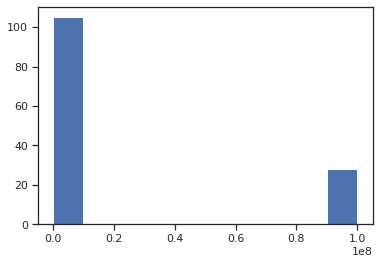

In [ ]:
plt.hist(df_norm['standard_value_norm'])

In [ ]:
def convert_to_pIC50(input):
    pIC50 = []

    for i in input['standard_value_norm']:
        molar = i*(10**-9) # Converts nM to M
        pIC50.append(-np.log10(molar))

    input['pIC50'] = pIC50
    x = input.drop('standard_value_norm', 1)
    return x

df_final = convert_to_pIC50(df_norm)
df_final[:5]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  if __name__ == '__main__':


,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,Num H Donors,Num H Acceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Inactive,338.344,3.53900,0.0,5.0,5.698970


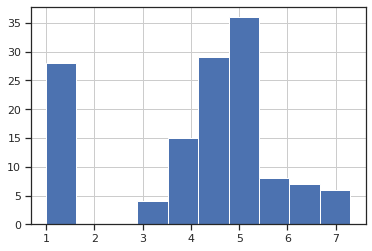

In [ ]:
df_final['pIC50'].hist()

In [ ]:
df_final['pIC50'].describe()

count    133.000000
mean       4.060148
std        1.783762
min        1.000000
25%        3.522879
50%        4.628932
75%        4.970616
max        7.301030
Name: pIC50, dtype: float64

In [ ]:
df_final = df_final[df_final['bioactivity_class'] != 'intermediate']

In [ ]:
df_final[:5]

,molecule_chembl_id,canonical_smiles,bioactivity_class,MW,LogP,Num H Donors,Num H Acceptors,pIC50
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,Inactive,281.271,1.89262,0.0,5.0,5.142668
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,Inactive,415.589,3.81320,0.0,2.0,5.026872
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,Inactive,421.190,2.66050,0.0,4.0,4.869666
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,Inactive,293.347,3.63080,0.0,3.0,4.882397
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],Inactive,338.344,3.53900,0.0,5.0,5.698970


In [ ]:
(df_final['bioactivity_class'] == 'intermediate').sum()

0

In [ ]:
neworder = ['molecule_chembl_id',	'canonical_smiles',	'pIC50',	'MW',	'LogP',	'Num H' ,'Donors',	'Num H Acceptors',	'bioactivity_class']
df_final=df_final.reindex(columns=neworder)

In [ ]:
df_final[['bioactivity_class', 'pIC50']] = df_final[['pIC50','bioactivity_class']]

In [ ]:
df_final[:5]

,molecule_chembl_id,canonical_smiles,pIC50,MW,LogP,Num H,Donors,Num H Acceptors,bioactivity_class
0,CHEMBL187579,Cc1noc(C)c1CN1C(=O)C(=O)c2cc(C#N)ccc21,5.142668,281.271,1.89262,NaN,NaN,5.0,Inactive
1,CHEMBL188487,O=C1C(=O)N(Cc2ccc(F)cc2Cl)c2ccc(I)cc21,5.026872,415.589,3.81320,NaN,NaN,2.0,Inactive
2,CHEMBL185698,O=C1C(=O)N(CC2COc3ccccc3O2)c2ccc(I)cc21,4.869666,421.190,2.66050,NaN,NaN,4.0,Inactive
3,CHEMBL426082,O=C1C(=O)N(Cc2cc3ccccc3s2)c2ccccc21,4.882397,293.347,3.63080,NaN,NaN,3.0,Inactive
4,CHEMBL187717,O=C1C(=O)N(Cc2cc3ccccc3s2)c2c1cccc2[N+](=O)[O-],5.698970,338.344,3.53900,NaN,NaN,5.0,Inactive


In [ ]:
sns.set(style='ticks')

Text(0, 0.5, 'Frequency')

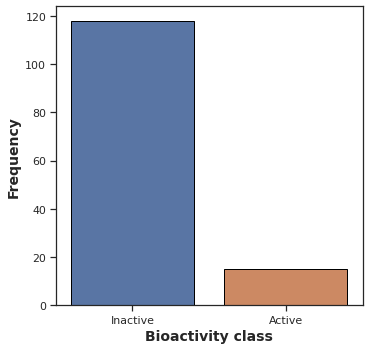

In [ ]:
plt.figure(figsize=(5.5, 5.5))

sns.countplot(x=df_final['bioactivity_class'], data=df_final, edgecolor='black')

plt.xlabel('Bioactivity class', fontsize=14, fontweight='bold')
plt.ylabel('Frequency', fontsize=14, fontweight='bold')